# Seoul Bike Trip Duration Prediction

<img src="Features_Description.png" style="float:right;" width="500"/>

### Context
- Trip duration is the most fundamental measure in all modes of transportation. 
- Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. 
- In order to predict the trip duration, data mining techniques are employed in this paper to predict the trip duration of rental bikes in Seoul Bike sharing system. 
- The prediction is carried out with the combination of Seoul Bike data and weather data.

### Content
- The Data used include trip duration, trip distance, pickup-dropoff latitude and longitude, 
temperature, precipitation, wind speed, humidity, solar radiation, snowfall, ground temperature and 1-hour average dust concentration.

### Acknowledgements
- V E, Sathishkumar (2020), "Seoul Bike Trip duration prediction", Mendeley Data, V1, doi: 10.17632/gtfh9z865f.1
- Sathishkumar V E, Jangwoo Park, Yongyun Cho, (2019), Seoul bike trip duration prediction using data mining techniques, IET Intelligent Transport Systems, doi: 10.1049/iet-its.2019.0796

### Goal
- Predict the trip duration

### Steps
- Exploratory Data Analysis (EDA)
- **Data Preprocessing**
- **Feature Selection / Transformation**
- Mahcine Learning Algorithm
- Feature Importance / Engineering
- Hyperparameter Tuning
- Model Deployment

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from helper_functions import *

from timeit import default_timer as timer

In [2]:
# import sklearn
# sklearn.__version__ #'0.22.1'

## Data

In [3]:
dataset = joblib.load('data/dataset.pkl')

In [4]:
dataset.sample(10).T

,4789631,3962878,1665731,2703586,7232672,5749319,8106905,9458573,6330645,2507990
Duration,3.000000,30.000000,44.000000,40.000000,25.000000,35.000000,12.000000,13.000000,32.000000,57.000000
Distance,570.000000,4730.000000,6640.000000,5500.000000,5400.000000,5190.000000,1420.000000,3280.000000,4940.000000,5160.000000
PLong,37.542580,37.536579,37.550488,37.582592,37.600433,37.548496,37.518738,37.577793,37.494282,37.626080
PLatd,127.063309,127.092972,127.108955,127.028976,127.040207,127.074760,126.895576,127.057831,126.859215,127.026482
DLong,37.544590,37.516571,37.561371,37.582592,37.587791,37.547829,37.527084,37.561447,37.494282,37.658588
DLatd,127.057083,127.131538,127.063660,127.028976,127.037361,127.072632,126.891380,127.034920,126.859215,127.035210
Haversine,0.592676,4.064020,4.172149,0.000000,1.427917,0.201733,0.999090,2.716806,0.000000,3.695517
Pmonth,8.000000,7.000000,5.000000,6.000000,10.000000,9.000000,10.000000,12.000000,9.000000,6.000000
Pday,11.000000,17.000000,10.000000,10.000000,9.000000,7.000000,29.000000,21.000000,19.000000,5.000000
Phour,12.000000,7.000000,2.000000,21.000000,17.000000,21.000000,20.000000,5.000000,21.000000,20.000000


## Data Preprocessing

In [5]:
dataset.shape

(9601139, 25)

### Check for missing values

In [6]:
dataset.isnull().sum().sum()

0

### Remove outliers

In [7]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
a =(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))
a.sum(axis=1).sum()

3178462

In [8]:
from scipy import stats

z = np.abs(stats.zscore(dataset))
out = np.where(z>3)
out[0].shape

(1001150,)

In [9]:
dataset = dataset.drop(index=out[0], axis=0)
dataset.shape

(8790348, 25)

### Remove duplicated instances

In [10]:
dataset = dataset.drop_duplicates()
dataset.shape

(8768965, 25)

### Dump the dataset

In [11]:
joblib.dump(dataset, 'data/dataset_cleaned.pkl')

['data/dataset_cleaned.pkl']

## Feature Transformation

### Check for categorical features for encoding

In [12]:
dataset.select_dtypes(include='object').sum()

Series([], dtype: float64)

## Feature Selection

In [13]:
frac = 1
# frac = 0.1

X = dataset.drop(columns='Duration').sample(frac=frac, random_state=42)
y = dataset['Duration'].sample(frac=frac, random_state=42)

In [14]:
from sklearn.model_selection import train_test_split

# train:val:test = 80:10:10
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = \
train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [15]:
X_train.shape, X_val.shape, X_test.shape

((7015172, 24), (876896, 24), (876897, 24))

### Recursive Feature Elimination (RFE)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=10, n_jobs=10) 
rfe = RFE(estimator, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)
X_test_rfe = rfe.transform(X_test)

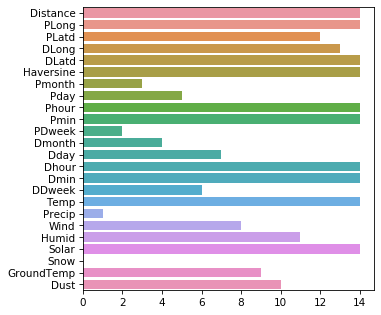

In [21]:
plt.figure(figsize=(5,5), dpi=75)
sns.barplot(y=X_train.columns, x=max(rfe.ranking_)-rfe.ranking_);

In [22]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['Distance', 'PLong', 'DLatd', 'Haversine', 'Phour', 'Pmin', 'Dhour',
       'Dmin', 'Temp', 'Solar'],
      dtype='object')

In [23]:
X_train_ = pd.DataFrame(X_train, columns=rfe_features)
X_val_ = pd.DataFrame(X_val, columns=rfe_features)
X_test_ = pd.DataFrame(X_test, columns=rfe_features)

In [24]:
joblib.dump(X_train_, 'data/X_train.pkl')
joblib.dump(X_val_, 'data/X_val.pkl')
joblib.dump(X_test_, 'data/X_test.pkl')

joblib.dump(y_train, 'data/y_train.pkl')
joblib.dump(y_val, 'data/y_val.pkl')
joblib.dump(y_test, 'data/y_test.pkl')

['data/y_test.pkl']